## Adaptive Histogram Equalization

In **Adaptive Histogram Equalization** the image is divided into small blocks called "tiles" (tileSize is 8x8 by default in OpenCV). Then each of these blocks are histogram equalized as usual. So in a small area, histogram would confine to a small region (unless there is noise). If noise is there, it will be amplified. To avoid this, contrast limiting is applied. If any histogram bin is above the specified contrast limit (by default 40 in OpenCV), those pixels are clipped and distributed uniformly to other bins before applying histogram equalization. After equalization, to remove artifacts in tile borders, bilinear interpolation is applied.

---
### Function Syntax
``` python
	retval	=	cv.createCLAHE(	[, clipLimit[, tileGridSize]]	)
```
#### Parameters
* **`clipLimit`**	Threshold for contrast limiting.
* **`tileGridSize`**	Size of grid for histogram equalization. Input image will be divided into equally sized rectangular tiles. tileGridSize defines the number of tiles in row and column.

---

### Function Syntax
``` python
    dst	=	cv.CLAHE.apply(	src[, dst]	)
```

#### Parameters
* **`src`** Source image of type CV_8UC1 or CV_16UC1.
* **`dst`** Destination image

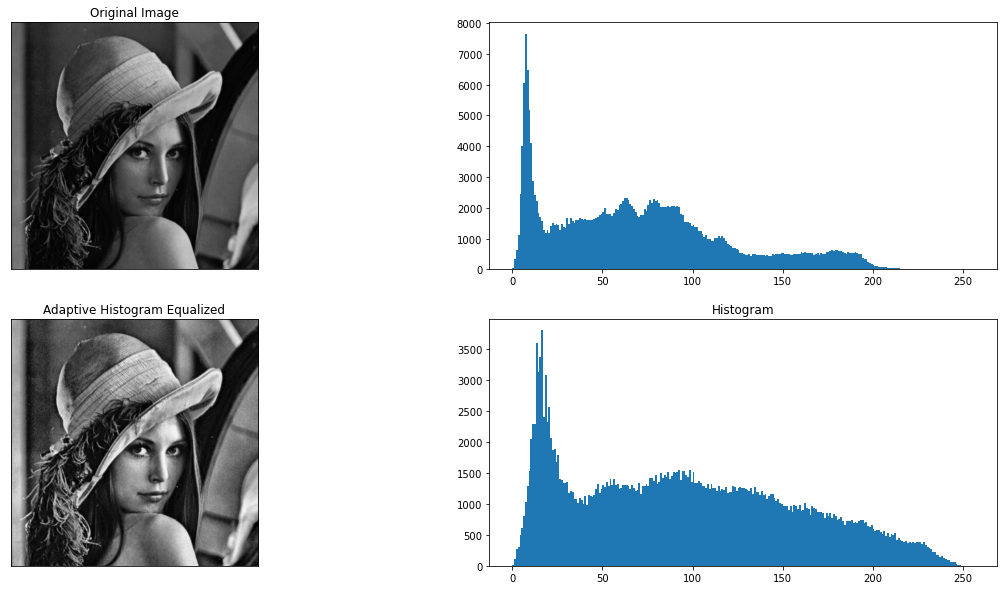

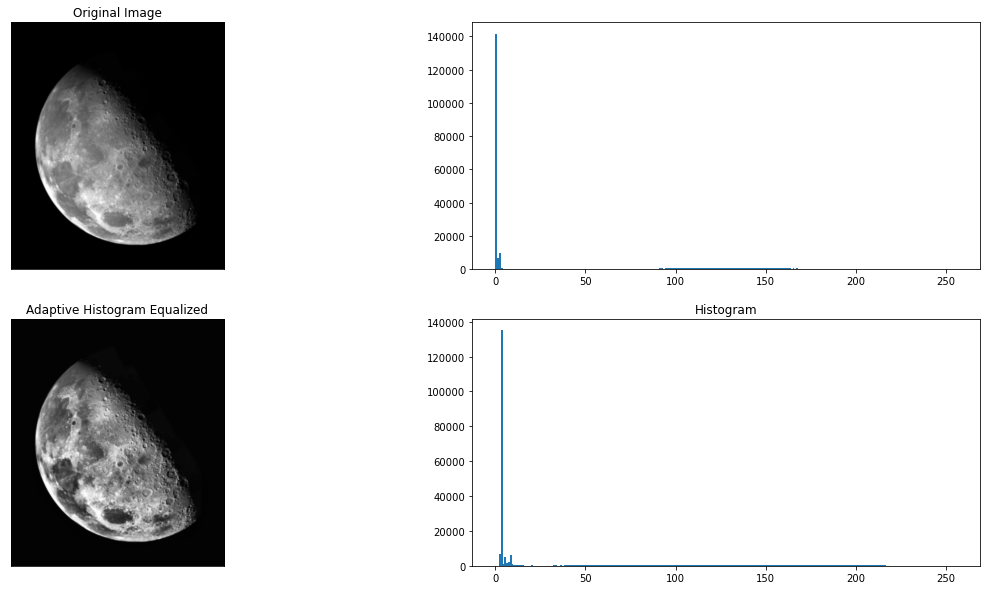

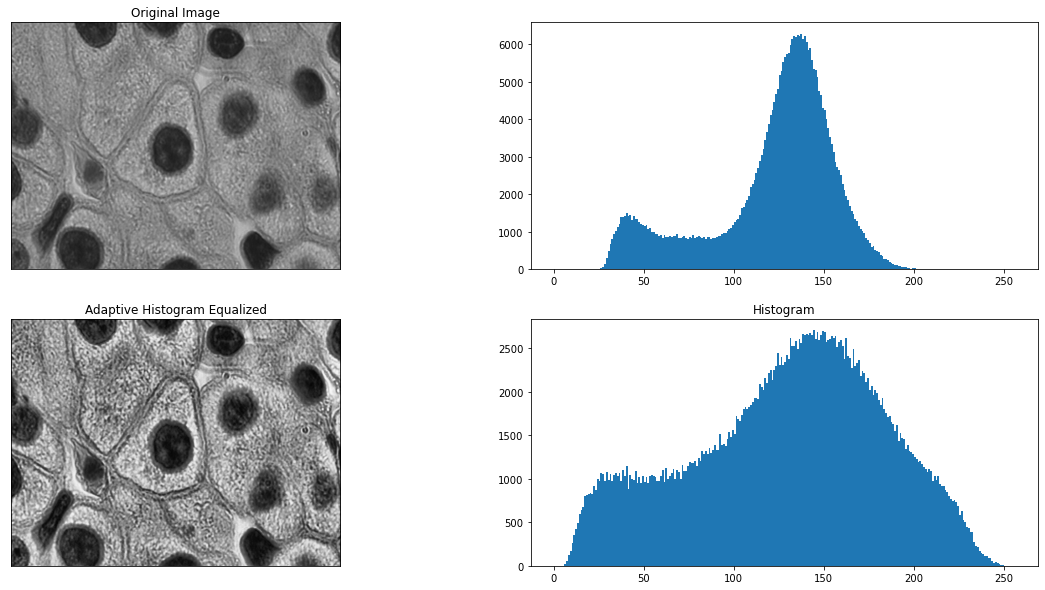

In [1]:
##########################################################################################
# Primary Contact    : v_s191@txstate.edu; vittal.siddaiah@gmail.com;
##########################################################################################
#Histogram equlization and Contrast enhancement.
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
#################################################################################


#################################################################################
def AdaptiveHistEqualize(imageFileName):
    panel, ax = plt.subplots(2,2,figsize=(20,10))

    imageData = cv2.imread(imageFileName, cv2.IMREAD_GRAYSCALE)  #Color Image is Scanned
    [fileName, ext] = os.path.splitext(os.path.basename(imageFileName))
    fileName += "-grayImageOriginal" + ext
    fileName = "./Images/" + fileName
    cv2.imwrite(fileName, imageData)
    ax[0,0].imshow(cv2.imread(fileName))
    ax[0,0].set_title('Original Image')
    ax[0,0].set_xticks([])
    ax[0,0].set_yticks([])


    imageDataGrayScale = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)
    hist = cv2.calcHist([imageDataGrayScale],[0],None,[256],[0,256])
    ax[0,1].hist(imageDataGrayScale.ravel(),256,[0,256])



    #histEqualData = cv2.equalizeHist(imageDataGrayScale)  #Histogram equalization is done here.
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    histEqualData = clahe.apply(imageDataGrayScale)
    
    
    [fileName, ext] = os.path.splitext(os.path.basename(imageFileName))
    fileName += "-histEqual" + ext
    fileName = "./Images/" + fileName
    cv2.imwrite(fileName, histEqualData)
    ax[1,0].imshow(cv2.imread(fileName))
    ax[1,0].set_title('Adaptive Histogram Equalized')
    ax[1,0].set_xticks([])
    ax[1,0].set_yticks([])

    imageDataGrayScale = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)
    hist = cv2.calcHist([imageDataGrayScale],[0],None,[256],[0,256])
    ax[1,1].hist(imageDataGrayScale.ravel(),256,[0,256])
    ax[1,1].set_title('Histogram');

#################################################################################    
    
################################################################################# 
imagesPath = "../../../Images/"
AdaptiveHistEqualize(imagesPath + "lenna-RGB.tif")
AdaptiveHistEqualize(imagesPath + "moon-blurred.tif")
AdaptiveHistEqualize(imagesPath + "liver_cells.tif")